In [4]:
import numpy as np
from random import randrange, uniform
import gym
from tqdm import tqdm
import matplotlib.pyplot as plt 

# Simple bandit algorithm

### Stationary

In [2]:
env = gym.make('CartPole-v0')
ans=[]
epoch=100

for i_episode in range(epoch):
    observation = env.reset()
    Q=[0,0]
    N=[0,0]
    for t in range(100):
        env.render()
        e=uniform(0,1)
        if e>0.5:
            action = np.argmax(Q, axis=0)
        else:
            action = randrange(2)
        observation, reward, done, info = env.step(action)
        N[action]+=1
        Q[action]=Q[action]+(1/N[action])*(reward-Q[action])
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            ans.append(t+1)
            break
env.close()
print(sum(ans)/epoch)

Episode finished after 11 timesteps
Episode finished after 17 timesteps
Episode finished after 13 timesteps
Episode finished after 11 timesteps
Episode finished after 10 timesteps
Episode finished after 11 timesteps
Episode finished after 23 timesteps
Episode finished after 8 timesteps
Episode finished after 9 timesteps
Episode finished after 11 timesteps
Episode finished after 14 timesteps
Episode finished after 15 timesteps
Episode finished after 13 timesteps
Episode finished after 10 timesteps
Episode finished after 12 timesteps
Episode finished after 23 timesteps
Episode finished after 25 timesteps
Episode finished after 29 timesteps
Episode finished after 20 timesteps
Episode finished after 14 timesteps
Episode finished after 24 timesteps
Episode finished after 12 timesteps
Episode finished after 12 timesteps
Episode finished after 8 timesteps
Episode finished after 24 timesteps
Episode finished after 11 timesteps
Episode finished after 11 timesteps
Episode finished after 20 times

### Non-stationary

In [44]:
env = gym.make('CartPole-v0')
ans=[]
epoch=100

for i_episode in range(epoch):
    observation = env.reset()
    Q=[0,0]

    for t in range(100):
        env.render()
        e=uniform(0,1)
        if e>0.5:
            action = np.argmax(Q, axis=0)
        else:
            action = randrange(2)
        observation, reward, done, info = env.step(action)
        Q[action]=Q[action]+0.1*(reward-Q[action])
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            ans.append(t+1)
            break
env.close()
print(sum(ans)/epoch)

Episode finished after 22 timesteps
Episode finished after 12 timesteps
Episode finished after 11 timesteps
Episode finished after 11 timesteps
Episode finished after 10 timesteps
Episode finished after 12 timesteps
Episode finished after 12 timesteps
Episode finished after 14 timesteps
Episode finished after 14 timesteps
Episode finished after 14 timesteps
Episode finished after 16 timesteps
Episode finished after 29 timesteps
Episode finished after 20 timesteps
Episode finished after 17 timesteps
Episode finished after 13 timesteps
Episode finished after 14 timesteps
Episode finished after 16 timesteps
Episode finished after 17 timesteps
Episode finished after 21 timesteps
Episode finished after 18 timesteps
Episode finished after 12 timesteps
Episode finished after 9 timesteps
Episode finished after 14 timesteps
Episode finished after 47 timesteps
Episode finished after 19 timesteps
Episode finished after 17 timesteps
Episode finished after 17 timesteps
Episode finished after 15 tim

### Random actions

In [4]:
env = gym.make('CartPole-v0')
ans=[]
epoch=100
for i_episode in range(epoch):
    observation = env.reset()
    for t in range(100):
        env.render()
#         print(observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            ans.append(t+1)
            break
env.close()
print(sum(ans)/epoch)

Episode finished after 15 timesteps
Episode finished after 43 timesteps
Episode finished after 18 timesteps
Episode finished after 34 timesteps
Episode finished after 19 timesteps
Episode finished after 20 timesteps
Episode finished after 29 timesteps
Episode finished after 12 timesteps
Episode finished after 34 timesteps
Episode finished after 11 timesteps
Episode finished after 49 timesteps
Episode finished after 13 timesteps
Episode finished after 13 timesteps
Episode finished after 16 timesteps
Episode finished after 10 timesteps
Episode finished after 15 timesteps
Episode finished after 54 timesteps
Episode finished after 13 timesteps
Episode finished after 19 timesteps
Episode finished after 13 timesteps
Episode finished after 19 timesteps
Episode finished after 27 timesteps
Episode finished after 14 timesteps
Episode finished after 18 timesteps
Episode finished after 23 timesteps
Episode finished after 45 timesteps
Episode finished after 14 timesteps
Episode finished after 12 ti

In [ ]:
# !pip3 install Box2D
# !pip3 install box2d-py 
# pip3 install gym[box2d]
#pip3 install box2d
# pip3 uninstall box2d-kengz

In [ ]:
# !brew install swig

In [ ]:
# !pip3 install box2d-py box2d

### Lunar Lander - non-stationary

In [5]:
env = gym.make('LunarLander-v2')

epoch=20


for i_episode in range(epoch):
    observation = env.reset()
    
    Q=[0,0,0,0]
    for t in range(500):
        env.render()
        e=uniform(0,1)
        if e>0.25:
            action = np.argmax(Q, axis=0)
        else:
            action = randrange(4)
        observation, reward, done, info = env.step(action)
#         print(reward)
        Q[action]=Q[action]+0.01*(reward-Q[action])
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()

Episode finished after 136 timesteps
Episode finished after 147 timesteps
Episode finished after 183 timesteps
Episode finished after 140 timesteps
Episode finished after 116 timesteps
Episode finished after 91 timesteps
Episode finished after 107 timesteps
Episode finished after 170 timesteps
Episode finished after 165 timesteps
Episode finished after 160 timesteps
Episode finished after 131 timesteps
Episode finished after 134 timesteps
Episode finished after 79 timesteps
Episode finished after 131 timesteps
Episode finished after 109 timesteps
Episode finished after 108 timesteps
Episode finished after 204 timesteps
Episode finished after 122 timesteps
Episode finished after 118 timesteps
Episode finished after 161 timesteps


In [6]:
Q

[-1.5919448103720626,
 -0.5247490952894525,
 -0.5455554414087318,
 -0.5575317000433505]

#### Ex.2.5 - Sutton, Barto, November 5, 2017 + UCB

In [43]:
R_out_list=[]
for j in tqdm(range(2000)):
    Q=np.array([0.0 for x in range(10)])
    N=[0 for x in range(10)]
   
    R_list=[]
    for i in range(20000):
        e=uniform(0,1)
        if e>0.1:
            A=np.argmax(Q, axis=0)
        else:
            A=randrange(10)
        R=np.random.normal(Q[A], 1, 1)[0] 
        N[A]+=1
        Q[A]+=(1/N[A])*(R-Q[A]) 
        Q+=np.random.normal(0, 0.01, 10)
        R_list.append(R)
    R_out_list.append(R_list) 



  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 1/2000 [00:00<15:28,  2.15it/s]

  0%|          | 2/2000 [00:00<15:00,  2.22it/s]

  0%|          | 3/2000 [00:01<14:57,  2.22it/s]

  0%|          | 4/2000 [00:01<14:41,  2.26it/s]

  0%|          | 5/2000 [00:02<14:39,  2.27it/s]

  0%|          | 6/2000 [00:02<14:18,  2.32it/s]

  0%|          | 7/2000 [00:03<14:01,  2.37it/s]

  0%|          | 8/2000 [00:03<13:52,  2.39it/s]

  0%|          | 9/2000 [00:03<15:09,  2.19it/s]

  0%|          | 10/2000 [00:04<15:48,  2.10it/s]

  1%|          | 11/2000 [00:04<15:13,  2.18it/s]

  1%|          | 12/2000 [00:05<15:06,  2.19it/s]

  1%|          | 13/2000 [00:05<14:53,  2.22it/s]

  1%|          | 14/2000 [00:06<14:43,  2.25it/s]

  1%|          | 15/2000 [00:06<14:30,  2.28it/s]

  1%|          | 16/2000 [00:07<14:32,  2.27it/s]

  1%|          | 17/2000 [00:07<16:10,  2.04it/s]

  1%|          | 18/2000 [00:08<17:02,  1.94it/s]

  1%|          | 19/2000 [00:08<16:22,  2.02it/

  7%|▋         | 143/2000 [01:08<13:46,  2.25it/s]

  7%|▋         | 144/2000 [01:09<13:59,  2.21it/s]

  7%|▋         | 145/2000 [01:09<14:19,  2.16it/s]

  7%|▋         | 146/2000 [01:10<14:59,  2.06it/s]

  7%|▋         | 147/2000 [01:10<15:15,  2.02it/s]

  7%|▋         | 148/2000 [01:11<15:24,  2.00it/s]

  7%|▋         | 149/2000 [01:11<15:36,  1.98it/s]

  8%|▊         | 150/2000 [01:12<16:18,  1.89it/s]

  8%|▊         | 151/2000 [01:12<15:15,  2.02it/s]

  8%|▊         | 152/2000 [01:13<15:57,  1.93it/s]

  8%|▊         | 153/2000 [01:13<15:19,  2.01it/s]

  8%|▊         | 154/2000 [01:14<14:36,  2.11it/s]

  8%|▊         | 155/2000 [01:14<14:56,  2.06it/s]

  8%|▊         | 156/2000 [01:15<15:33,  1.98it/s]

  8%|▊         | 157/2000 [01:15<15:36,  1.97it/s]

  8%|▊         | 158/2000 [01:16<14:50,  2.07it/s]

  8%|▊         | 159/2000 [01:16<14:33,  2.11it/s]

  8%|▊         | 160/2000 [01:17<14:36,  2.10it/s]

  8%|▊         | 161/2000 [01:17<14:38,  2.09it/s]

  8%|▊      

 14%|█▍        | 284/2000 [02:12<11:57,  2.39it/s]

 14%|█▍        | 285/2000 [02:13<11:46,  2.43it/s]

 14%|█▍        | 286/2000 [02:13<11:33,  2.47it/s]

 14%|█▍        | 287/2000 [02:14<11:34,  2.47it/s]

 14%|█▍        | 288/2000 [02:14<11:28,  2.49it/s]

 14%|█▍        | 289/2000 [02:14<11:33,  2.47it/s]

 14%|█▍        | 290/2000 [02:15<11:24,  2.50it/s]

 15%|█▍        | 291/2000 [02:15<11:17,  2.52it/s]

 15%|█▍        | 292/2000 [02:16<11:12,  2.54it/s]

 15%|█▍        | 293/2000 [02:16<11:07,  2.56it/s]

 15%|█▍        | 294/2000 [02:16<11:05,  2.57it/s]

 15%|█▍        | 295/2000 [02:17<11:13,  2.53it/s]

 15%|█▍        | 296/2000 [02:17<11:08,  2.55it/s]

 15%|█▍        | 297/2000 [02:18<11:11,  2.54it/s]

 15%|█▍        | 298/2000 [02:18<11:15,  2.52it/s]

 15%|█▍        | 299/2000 [02:18<11:07,  2.55it/s]

 15%|█▌        | 300/2000 [02:19<11:12,  2.53it/s]

 15%|█▌        | 301/2000 [02:19<11:44,  2.41it/s]

 15%|█▌        | 302/2000 [02:20<11:35,  2.44it/s]

 15%|█▌     

 21%|██▏       | 425/2000 [03:10<10:59,  2.39it/s]

 21%|██▏       | 426/2000 [03:10<10:50,  2.42it/s]

 21%|██▏       | 427/2000 [03:11<10:37,  2.47it/s]

 21%|██▏       | 428/2000 [03:11<10:29,  2.50it/s]

 21%|██▏       | 429/2000 [03:11<10:25,  2.51it/s]

 22%|██▏       | 430/2000 [03:12<10:19,  2.53it/s]

 22%|██▏       | 431/2000 [03:12<10:38,  2.46it/s]

 22%|██▏       | 432/2000 [03:13<11:16,  2.32it/s]

 22%|██▏       | 433/2000 [03:13<10:54,  2.39it/s]

 22%|██▏       | 434/2000 [03:13<10:45,  2.43it/s]

 22%|██▏       | 435/2000 [03:14<10:34,  2.47it/s]

 22%|██▏       | 436/2000 [03:14<10:25,  2.50it/s]

 22%|██▏       | 437/2000 [03:15<10:41,  2.44it/s]

 22%|██▏       | 438/2000 [03:15<11:14,  2.32it/s]

 22%|██▏       | 439/2000 [03:15<10:53,  2.39it/s]

 22%|██▏       | 440/2000 [03:16<10:45,  2.42it/s]

 22%|██▏       | 441/2000 [03:16<10:42,  2.43it/s]

 22%|██▏       | 442/2000 [03:17<10:32,  2.46it/s]

 22%|██▏       | 443/2000 [03:17<10:23,  2.50it/s]

 22%|██▏    

 28%|██▊       | 566/2000 [04:07<10:07,  2.36it/s]

 28%|██▊       | 567/2000 [04:07<10:12,  2.34it/s]

 28%|██▊       | 568/2000 [04:08<09:58,  2.39it/s]

 28%|██▊       | 569/2000 [04:08<09:45,  2.44it/s]

 28%|██▊       | 570/2000 [04:08<09:46,  2.44it/s]

 29%|██▊       | 571/2000 [04:09<09:37,  2.48it/s]

 29%|██▊       | 572/2000 [04:09<09:34,  2.48it/s]

 29%|██▊       | 573/2000 [04:10<09:37,  2.47it/s]

 29%|██▊       | 574/2000 [04:10<09:29,  2.51it/s]

 29%|██▉       | 575/2000 [04:10<09:25,  2.52it/s]

 29%|██▉       | 576/2000 [04:11<09:20,  2.54it/s]

 29%|██▉       | 577/2000 [04:11<09:19,  2.54it/s]

 29%|██▉       | 578/2000 [04:12<09:26,  2.51it/s]

 29%|██▉       | 579/2000 [04:12<09:31,  2.49it/s]

 29%|██▉       | 580/2000 [04:12<09:39,  2.45it/s]

 29%|██▉       | 581/2000 [04:13<09:29,  2.49it/s]

 29%|██▉       | 582/2000 [04:13<09:26,  2.50it/s]

 29%|██▉       | 583/2000 [04:14<09:32,  2.48it/s]

 29%|██▉       | 584/2000 [04:14<09:27,  2.49it/s]

 29%|██▉    

 35%|███▌      | 707/2000 [05:07<08:51,  2.43it/s]

 35%|███▌      | 708/2000 [05:07<08:44,  2.46it/s]

 35%|███▌      | 709/2000 [05:07<08:35,  2.50it/s]

 36%|███▌      | 710/2000 [05:08<08:31,  2.52it/s]

 36%|███▌      | 711/2000 [05:08<08:27,  2.54it/s]

 36%|███▌      | 712/2000 [05:09<08:25,  2.55it/s]

 36%|███▌      | 713/2000 [05:09<08:23,  2.55it/s]

 36%|███▌      | 714/2000 [05:09<08:37,  2.48it/s]

 36%|███▌      | 715/2000 [05:10<08:32,  2.51it/s]

 36%|███▌      | 716/2000 [05:10<08:32,  2.51it/s]

 36%|███▌      | 717/2000 [05:11<08:27,  2.53it/s]

 36%|███▌      | 718/2000 [05:11<08:25,  2.53it/s]

 36%|███▌      | 719/2000 [05:11<08:23,  2.54it/s]

 36%|███▌      | 720/2000 [05:12<08:20,  2.56it/s]

 36%|███▌      | 721/2000 [05:12<08:19,  2.56it/s]

 36%|███▌      | 722/2000 [05:13<08:22,  2.54it/s]

 36%|███▌      | 723/2000 [05:13<08:20,  2.55it/s]

 36%|███▌      | 724/2000 [05:13<09:06,  2.33it/s]

 36%|███▋      | 725/2000 [05:14<09:08,  2.33it/s]

 36%|███▋   

 42%|████▏     | 848/2000 [06:04<07:49,  2.45it/s]

 42%|████▏     | 849/2000 [06:05<08:06,  2.37it/s]

 42%|████▎     | 850/2000 [06:05<08:16,  2.32it/s]

 43%|████▎     | 851/2000 [06:06<08:00,  2.39it/s]

 43%|████▎     | 852/2000 [06:06<07:47,  2.46it/s]

 43%|████▎     | 853/2000 [06:06<07:44,  2.47it/s]

 43%|████▎     | 854/2000 [06:07<07:37,  2.50it/s]

 43%|████▎     | 855/2000 [06:07<07:31,  2.54it/s]

 43%|████▎     | 856/2000 [06:08<07:27,  2.56it/s]

 43%|████▎     | 857/2000 [06:08<07:23,  2.58it/s]

 43%|████▎     | 858/2000 [06:08<07:21,  2.59it/s]

 43%|████▎     | 859/2000 [06:09<07:20,  2.59it/s]

 43%|████▎     | 860/2000 [06:09<07:46,  2.44it/s]

 43%|████▎     | 861/2000 [06:10<08:23,  2.26it/s]

 43%|████▎     | 862/2000 [06:10<08:06,  2.34it/s]

 43%|████▎     | 863/2000 [06:10<07:50,  2.42it/s]

 43%|████▎     | 864/2000 [06:11<07:41,  2.46it/s]

 43%|████▎     | 865/2000 [06:11<07:34,  2.50it/s]

 43%|████▎     | 866/2000 [06:12<07:45,  2.44it/s]

 43%|████▎  

 49%|████▉     | 989/2000 [07:02<07:06,  2.37it/s]

 50%|████▉     | 990/2000 [07:02<06:55,  2.43it/s]

 50%|████▉     | 991/2000 [07:03<06:48,  2.47it/s]

 50%|████▉     | 992/2000 [07:03<06:40,  2.51it/s]

 50%|████▉     | 993/2000 [07:03<06:37,  2.54it/s]

 50%|████▉     | 994/2000 [07:04<06:32,  2.56it/s]

 50%|████▉     | 995/2000 [07:04<06:30,  2.57it/s]

 50%|████▉     | 996/2000 [07:05<06:29,  2.58it/s]

 50%|████▉     | 997/2000 [07:05<06:41,  2.50it/s]

 50%|████▉     | 998/2000 [07:05<06:35,  2.53it/s]

 50%|████▉     | 999/2000 [07:06<06:35,  2.53it/s]

 50%|█████     | 1000/2000 [07:06<06:33,  2.54it/s]

 50%|█████     | 1001/2000 [07:06<06:31,  2.55it/s]

 50%|█████     | 1002/2000 [07:07<06:31,  2.55it/s]

 50%|█████     | 1003/2000 [07:07<06:30,  2.55it/s]

 50%|█████     | 1004/2000 [07:08<06:31,  2.55it/s]

 50%|█████     | 1005/2000 [07:08<06:28,  2.56it/s]

 50%|█████     | 1006/2000 [07:08<06:26,  2.57it/s]

 50%|█████     | 1007/2000 [07:09<06:24,  2.58it/s]

 50%

 56%|█████▋    | 1128/2000 [07:59<06:13,  2.34it/s]

 56%|█████▋    | 1129/2000 [07:59<06:14,  2.33it/s]

 56%|█████▋    | 1130/2000 [08:00<06:02,  2.40it/s]

 57%|█████▋    | 1131/2000 [08:00<06:14,  2.32it/s]

 57%|█████▋    | 1132/2000 [08:00<06:00,  2.41it/s]

 57%|█████▋    | 1133/2000 [08:01<05:52,  2.46it/s]

 57%|█████▋    | 1134/2000 [08:01<05:46,  2.50it/s]

 57%|█████▋    | 1135/2000 [08:02<05:45,  2.50it/s]

 57%|█████▋    | 1136/2000 [08:02<05:40,  2.54it/s]

 57%|█████▋    | 1137/2000 [08:02<05:40,  2.53it/s]

 57%|█████▋    | 1138/2000 [08:03<05:39,  2.54it/s]

 57%|█████▋    | 1139/2000 [08:03<05:38,  2.55it/s]

 57%|█████▋    | 1140/2000 [08:04<05:44,  2.50it/s]

 57%|█████▋    | 1141/2000 [08:04<05:39,  2.53it/s]

 57%|█████▋    | 1142/2000 [08:04<05:51,  2.44it/s]

 57%|█████▋    | 1143/2000 [08:05<05:45,  2.48it/s]

 57%|█████▋    | 1144/2000 [08:05<05:41,  2.50it/s]

 57%|█████▋    | 1145/2000 [08:06<05:38,  2.53it/s]

 57%|█████▋    | 1146/2000 [08:06<05:36,  2.54

 63%|██████▎   | 1266/2000 [08:55<04:54,  2.50it/s]

 63%|██████▎   | 1267/2000 [08:56<05:07,  2.38it/s]

 63%|██████▎   | 1268/2000 [08:56<05:00,  2.44it/s]

 63%|██████▎   | 1269/2000 [08:57<04:55,  2.47it/s]

 64%|██████▎   | 1270/2000 [08:57<04:58,  2.45it/s]

 64%|██████▎   | 1271/2000 [08:57<05:20,  2.27it/s]

 64%|██████▎   | 1272/2000 [08:58<05:22,  2.26it/s]

 64%|██████▎   | 1273/2000 [08:58<05:10,  2.34it/s]

 64%|██████▎   | 1274/2000 [08:59<05:01,  2.41it/s]

 64%|██████▍   | 1275/2000 [08:59<04:55,  2.46it/s]

 64%|██████▍   | 1276/2000 [08:59<04:49,  2.50it/s]

 64%|██████▍   | 1277/2000 [09:00<04:47,  2.52it/s]

 64%|██████▍   | 1278/2000 [09:00<04:49,  2.49it/s]

 64%|██████▍   | 1279/2000 [09:01<04:47,  2.51it/s]

 64%|██████▍   | 1280/2000 [09:01<04:43,  2.54it/s]

 64%|██████▍   | 1281/2000 [09:02<05:09,  2.33it/s]

 64%|██████▍   | 1282/2000 [09:02<05:02,  2.37it/s]

 64%|██████▍   | 1283/2000 [09:02<05:23,  2.22it/s]

 64%|██████▍   | 1284/2000 [09:03<05:17,  2.25

 70%|███████   | 1404/2000 [09:53<04:20,  2.29it/s]

 70%|███████   | 1405/2000 [09:54<04:14,  2.34it/s]

 70%|███████   | 1406/2000 [09:54<04:08,  2.39it/s]

 70%|███████   | 1407/2000 [09:54<04:07,  2.40it/s]

 70%|███████   | 1408/2000 [09:55<04:01,  2.45it/s]

 70%|███████   | 1409/2000 [09:55<03:58,  2.48it/s]

 70%|███████   | 1410/2000 [09:56<03:55,  2.50it/s]

 71%|███████   | 1411/2000 [09:56<03:53,  2.53it/s]

 71%|███████   | 1412/2000 [09:56<03:51,  2.54it/s]

 71%|███████   | 1413/2000 [09:57<03:50,  2.55it/s]

 71%|███████   | 1414/2000 [09:57<03:49,  2.55it/s]

 71%|███████   | 1415/2000 [09:57<03:48,  2.56it/s]

 71%|███████   | 1416/2000 [09:58<03:47,  2.57it/s]

 71%|███████   | 1417/2000 [09:58<03:46,  2.57it/s]

 71%|███████   | 1418/2000 [09:59<04:07,  2.36it/s]

 71%|███████   | 1419/2000 [09:59<03:59,  2.42it/s]

 71%|███████   | 1420/2000 [10:00<03:54,  2.47it/s]

 71%|███████   | 1421/2000 [10:00<03:51,  2.50it/s]

 71%|███████   | 1422/2000 [10:00<04:02,  2.39

 77%|███████▋  | 1542/2000 [10:49<03:08,  2.42it/s]

 77%|███████▋  | 1543/2000 [10:50<03:06,  2.45it/s]

 77%|███████▋  | 1544/2000 [10:50<03:03,  2.49it/s]

 77%|███████▋  | 1545/2000 [10:50<03:01,  2.51it/s]

 77%|███████▋  | 1546/2000 [10:51<03:02,  2.49it/s]

 77%|███████▋  | 1547/2000 [10:51<02:59,  2.52it/s]

 77%|███████▋  | 1548/2000 [10:52<02:59,  2.51it/s]

 77%|███████▋  | 1549/2000 [10:52<02:59,  2.51it/s]

 78%|███████▊  | 1550/2000 [10:52<03:04,  2.44it/s]

 78%|███████▊  | 1551/2000 [10:53<03:00,  2.48it/s]

 78%|███████▊  | 1552/2000 [10:53<03:00,  2.48it/s]

 78%|███████▊  | 1553/2000 [10:54<03:08,  2.37it/s]

 78%|███████▊  | 1554/2000 [10:54<03:10,  2.34it/s]

 78%|███████▊  | 1555/2000 [10:55<03:04,  2.42it/s]

 78%|███████▊  | 1556/2000 [10:55<03:00,  2.46it/s]

 78%|███████▊  | 1557/2000 [10:55<02:57,  2.49it/s]

 78%|███████▊  | 1558/2000 [10:56<02:55,  2.51it/s]

 78%|███████▊  | 1559/2000 [10:56<03:00,  2.44it/s]

 78%|███████▊  | 1560/2000 [10:57<02:57,  2.48

 84%|████████▍ | 1680/2000 [11:46<02:14,  2.38it/s]

 84%|████████▍ | 1681/2000 [11:46<02:14,  2.36it/s]

 84%|████████▍ | 1682/2000 [11:47<02:11,  2.42it/s]

 84%|████████▍ | 1683/2000 [11:47<02:09,  2.45it/s]

 84%|████████▍ | 1684/2000 [11:48<02:19,  2.27it/s]

 84%|████████▍ | 1685/2000 [11:48<02:13,  2.35it/s]

 84%|████████▍ | 1686/2000 [11:48<02:10,  2.41it/s]

 84%|████████▍ | 1687/2000 [11:49<02:07,  2.45it/s]

 84%|████████▍ | 1688/2000 [11:49<02:05,  2.48it/s]

 84%|████████▍ | 1689/2000 [11:50<02:03,  2.51it/s]

 84%|████████▍ | 1690/2000 [11:50<02:02,  2.53it/s]

 85%|████████▍ | 1691/2000 [11:50<02:06,  2.44it/s]

 85%|████████▍ | 1692/2000 [11:51<02:04,  2.47it/s]

 85%|████████▍ | 1693/2000 [11:51<02:02,  2.51it/s]

 85%|████████▍ | 1694/2000 [11:52<02:00,  2.54it/s]

 85%|████████▍ | 1695/2000 [11:52<01:59,  2.56it/s]

 85%|████████▍ | 1696/2000 [11:52<02:05,  2.43it/s]

 85%|████████▍ | 1697/2000 [11:53<02:09,  2.33it/s]

 85%|████████▍ | 1698/2000 [11:53<02:16,  2.21

 91%|█████████ | 1818/2000 [12:43<01:14,  2.44it/s]

 91%|█████████ | 1819/2000 [12:43<01:14,  2.44it/s]

 91%|█████████ | 1820/2000 [12:43<01:12,  2.48it/s]

 91%|█████████ | 1821/2000 [12:44<01:11,  2.52it/s]

 91%|█████████ | 1822/2000 [12:44<01:10,  2.53it/s]

 91%|█████████ | 1823/2000 [12:45<01:09,  2.54it/s]

 91%|█████████ | 1824/2000 [12:45<01:09,  2.55it/s]

 91%|█████████▏| 1825/2000 [12:45<01:08,  2.55it/s]

 91%|█████████▏| 1826/2000 [12:46<01:08,  2.55it/s]

 91%|█████████▏| 1827/2000 [12:46<01:07,  2.54it/s]

 91%|█████████▏| 1828/2000 [12:47<01:07,  2.55it/s]

 91%|█████████▏| 1829/2000 [12:47<01:06,  2.57it/s]

 92%|█████████▏| 1830/2000 [12:47<01:06,  2.56it/s]

 92%|█████████▏| 1831/2000 [12:48<01:06,  2.56it/s]

 92%|█████████▏| 1832/2000 [12:48<01:07,  2.49it/s]

 92%|█████████▏| 1833/2000 [12:49<01:06,  2.51it/s]

 92%|█████████▏| 1834/2000 [12:49<01:05,  2.53it/s]

 92%|█████████▏| 1835/2000 [12:49<01:05,  2.53it/s]

 92%|█████████▏| 1836/2000 [12:50<01:06,  2.46

 98%|█████████▊| 1956/2000 [13:39<00:19,  2.26it/s]

 98%|█████████▊| 1957/2000 [13:40<00:18,  2.33it/s]

 98%|█████████▊| 1958/2000 [13:40<00:17,  2.39it/s]

 98%|█████████▊| 1959/2000 [13:41<00:16,  2.45it/s]

 98%|█████████▊| 1960/2000 [13:41<00:16,  2.45it/s]

 98%|█████████▊| 1961/2000 [13:41<00:16,  2.41it/s]

 98%|█████████▊| 1962/2000 [13:42<00:15,  2.45it/s]

 98%|█████████▊| 1963/2000 [13:42<00:15,  2.45it/s]

 98%|█████████▊| 1964/2000 [13:43<00:14,  2.45it/s]

 98%|█████████▊| 1965/2000 [13:43<00:14,  2.47it/s]

 98%|█████████▊| 1966/2000 [13:43<00:13,  2.49it/s]

 98%|█████████▊| 1967/2000 [13:44<00:13,  2.52it/s]

 98%|█████████▊| 1968/2000 [13:44<00:12,  2.53it/s]

 98%|█████████▊| 1969/2000 [13:45<00:12,  2.54it/s]

 98%|█████████▊| 1970/2000 [13:45<00:11,  2.55it/s]

 99%|█████████▊| 1971/2000 [13:45<00:11,  2.56it/s]

 99%|█████████▊| 1972/2000 [13:46<00:10,  2.56it/s]

 99%|█████████▊| 1973/2000 [13:46<00:10,  2.56it/s]

 99%|█████████▊| 1974/2000 [13:46<00:10,  2.56

In [44]:
Q

array([ 0.09482874,  3.57328139, -2.76056007,  0.05603642, -2.31040993,
       -2.65182571,  0.55609147,  2.98951011,  0.35955567,  3.02270091])

In [45]:
R_out_list_1=[]
for j in tqdm(range(2000)):
    Q=np.array([0.0 for x in range(10)])  
    R_list=[]
    for i in range(20000):
        e=uniform(0,1)
        if e>0.1:
            A=np.argmax(Q, axis=0)
        else:
            A=randrange(10)
        R=np.random.normal(Q[A], 1, 1)[0]
        Q[A]+=0.1*(R-Q[A])
        Q+=np.random.normal(0, 0.01, 10)       
        R_list.append(R)
    R_out_list_1.append(R_list) 



  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 1/2000 [00:00<13:31,  2.46it/s]

  0%|          | 2/2000 [00:00<13:26,  2.48it/s]

  0%|          | 3/2000 [00:01<13:36,  2.44it/s]

  0%|          | 4/2000 [00:01<14:16,  2.33it/s]

  0%|          | 5/2000 [00:02<13:55,  2.39it/s]

  0%|          | 6/2000 [00:02<13:46,  2.41it/s]

  0%|          | 7/2000 [00:02<13:28,  2.46it/s]

  0%|          | 8/2000 [00:03<13:23,  2.48it/s]

  0%|          | 9/2000 [00:03<13:19,  2.49it/s]

  0%|          | 10/2000 [00:04<13:19,  2.49it/s]

  1%|          | 11/2000 [00:04<13:22,  2.48it/s]

  1%|          | 12/2000 [00:04<13:20,  2.48it/s]

  1%|          | 13/2000 [00:05<13:29,  2.45it/s]

  1%|          | 14/2000 [00:05<13:33,  2.44it/s]

  1%|          | 15/2000 [00:06<13:33,  2.44it/s]

  1%|          | 16/2000 [00:06<13:23,  2.47it/s]

  1%|          | 17/2000 [00:06<13:57,  2.37it/s]

  1%|          | 18/2000 [00:07<13:42,  2.41it/s]

  1%|          | 19/2000 [00:07<13:49,  2.39it/

  7%|▋         | 143/2000 [00:59<12:49,  2.41it/s]

  7%|▋         | 144/2000 [00:59<13:00,  2.38it/s]

  7%|▋         | 145/2000 [00:59<12:36,  2.45it/s]

  7%|▋         | 146/2000 [01:00<12:17,  2.52it/s]

  7%|▋         | 147/2000 [01:00<12:06,  2.55it/s]

  7%|▋         | 148/2000 [01:01<11:57,  2.58it/s]

  7%|▋         | 149/2000 [01:01<11:59,  2.57it/s]

  8%|▊         | 150/2000 [01:01<11:55,  2.58it/s]

  8%|▊         | 151/2000 [01:02<11:53,  2.59it/s]

  8%|▊         | 152/2000 [01:02<11:49,  2.60it/s]

  8%|▊         | 153/2000 [01:02<11:45,  2.62it/s]

  8%|▊         | 154/2000 [01:03<11:43,  2.62it/s]

  8%|▊         | 155/2000 [01:03<11:46,  2.61it/s]

  8%|▊         | 156/2000 [01:04<11:44,  2.62it/s]

  8%|▊         | 157/2000 [01:04<11:42,  2.62it/s]

  8%|▊         | 158/2000 [01:04<11:55,  2.57it/s]

  8%|▊         | 159/2000 [01:05<11:49,  2.59it/s]

  8%|▊         | 160/2000 [01:05<11:49,  2.59it/s]

  8%|▊         | 161/2000 [01:06<11:44,  2.61it/s]

  8%|▊      

 14%|█▍        | 284/2000 [01:54<11:40,  2.45it/s]

 14%|█▍        | 285/2000 [01:55<11:52,  2.41it/s]

 14%|█▍        | 286/2000 [01:55<11:47,  2.42it/s]

 14%|█▍        | 287/2000 [01:56<11:30,  2.48it/s]

 14%|█▍        | 288/2000 [01:56<11:19,  2.52it/s]

 14%|█▍        | 289/2000 [01:56<11:36,  2.46it/s]

 14%|█▍        | 290/2000 [01:57<11:22,  2.51it/s]

 15%|█▍        | 291/2000 [01:57<11:59,  2.37it/s]

 15%|█▍        | 292/2000 [01:58<11:48,  2.41it/s]

 15%|█▍        | 293/2000 [01:58<11:28,  2.48it/s]

 15%|█▍        | 294/2000 [01:58<11:14,  2.53it/s]

 15%|█▍        | 295/2000 [01:59<11:24,  2.49it/s]

 15%|█▍        | 296/2000 [01:59<11:19,  2.51it/s]

 15%|█▍        | 297/2000 [02:00<11:07,  2.55it/s]

 15%|█▍        | 298/2000 [02:00<11:00,  2.58it/s]

 15%|█▍        | 299/2000 [02:00<10:55,  2.59it/s]

 15%|█▌        | 300/2000 [02:01<10:53,  2.60it/s]

 15%|█▌        | 301/2000 [02:01<10:49,  2.61it/s]

 15%|█▌        | 302/2000 [02:02<10:51,  2.61it/s]

 15%|█▌     

 21%|██▏       | 425/2000 [02:50<10:20,  2.54it/s]

 21%|██▏       | 426/2000 [02:50<10:20,  2.54it/s]

 21%|██▏       | 427/2000 [02:51<10:14,  2.56it/s]

 21%|██▏       | 428/2000 [02:51<10:08,  2.58it/s]

 21%|██▏       | 429/2000 [02:51<10:01,  2.61it/s]

 22%|██▏       | 430/2000 [02:52<09:57,  2.63it/s]

 22%|██▏       | 431/2000 [02:52<09:54,  2.64it/s]

 22%|██▏       | 432/2000 [02:53<10:19,  2.53it/s]

 22%|██▏       | 433/2000 [02:53<10:29,  2.49it/s]

 22%|██▏       | 434/2000 [02:53<10:24,  2.51it/s]

 22%|██▏       | 435/2000 [02:54<10:12,  2.56it/s]

 22%|██▏       | 436/2000 [02:54<10:04,  2.59it/s]

 22%|██▏       | 437/2000 [02:54<10:01,  2.60it/s]

 22%|██▏       | 438/2000 [02:55<10:01,  2.60it/s]

 22%|██▏       | 439/2000 [02:55<10:00,  2.60it/s]

 22%|██▏       | 440/2000 [02:56<10:16,  2.53it/s]

 22%|██▏       | 441/2000 [02:56<10:08,  2.56it/s]

 22%|██▏       | 442/2000 [02:56<10:10,  2.55it/s]

 22%|██▏       | 443/2000 [02:57<10:01,  2.59it/s]

 22%|██▏    

 28%|██▊       | 566/2000 [03:45<09:16,  2.57it/s]

 28%|██▊       | 567/2000 [03:46<09:18,  2.57it/s]

 28%|██▊       | 568/2000 [03:46<09:11,  2.59it/s]

 28%|██▊       | 569/2000 [03:46<09:06,  2.62it/s]

 28%|██▊       | 570/2000 [03:47<09:49,  2.43it/s]

 29%|██▊       | 571/2000 [03:47<09:35,  2.48it/s]

 29%|██▊       | 572/2000 [03:48<09:20,  2.55it/s]

 29%|██▊       | 573/2000 [03:48<09:19,  2.55it/s]

 29%|██▊       | 574/2000 [03:48<09:13,  2.58it/s]

 29%|██▉       | 575/2000 [03:49<09:07,  2.60it/s]

 29%|██▉       | 576/2000 [03:49<09:05,  2.61it/s]

 29%|██▉       | 577/2000 [03:50<09:02,  2.62it/s]

 29%|██▉       | 578/2000 [03:50<09:35,  2.47it/s]

 29%|██▉       | 579/2000 [03:50<09:24,  2.52it/s]

 29%|██▉       | 580/2000 [03:51<09:16,  2.55it/s]

 29%|██▉       | 581/2000 [03:51<09:09,  2.58it/s]

 29%|██▉       | 582/2000 [03:52<09:24,  2.51it/s]

 29%|██▉       | 583/2000 [03:52<09:16,  2.55it/s]

 29%|██▉       | 584/2000 [03:52<09:42,  2.43it/s]

 29%|██▉    

 35%|███▌      | 707/2000 [04:41<10:01,  2.15it/s]

 35%|███▌      | 708/2000 [04:41<10:07,  2.13it/s]

 35%|███▌      | 709/2000 [04:42<09:32,  2.25it/s]

 36%|███▌      | 710/2000 [04:42<09:07,  2.35it/s]

 36%|███▌      | 711/2000 [04:42<09:31,  2.25it/s]

 36%|███▌      | 712/2000 [04:43<09:06,  2.36it/s]

 36%|███▌      | 713/2000 [04:43<09:10,  2.34it/s]

 36%|███▌      | 714/2000 [04:44<09:39,  2.22it/s]

 36%|███▌      | 715/2000 [04:44<09:11,  2.33it/s]

 36%|███▌      | 716/2000 [04:44<08:50,  2.42it/s]

 36%|███▌      | 717/2000 [04:45<08:37,  2.48it/s]

 36%|███▌      | 718/2000 [04:45<08:31,  2.50it/s]

 36%|███▌      | 719/2000 [04:46<08:28,  2.52it/s]

 36%|███▌      | 720/2000 [04:46<08:19,  2.56it/s]

 36%|███▌      | 721/2000 [04:46<08:14,  2.59it/s]

 36%|███▌      | 722/2000 [04:47<08:11,  2.60it/s]

 36%|███▌      | 723/2000 [04:47<08:08,  2.62it/s]

 36%|███▌      | 724/2000 [04:47<08:04,  2.63it/s]

 36%|███▋      | 725/2000 [04:48<08:04,  2.63it/s]

 36%|███▋   

 42%|████▏     | 848/2000 [05:36<07:32,  2.54it/s]

 42%|████▏     | 849/2000 [05:37<07:30,  2.56it/s]

 42%|████▎     | 850/2000 [05:37<07:26,  2.57it/s]

 43%|████▎     | 851/2000 [05:37<07:24,  2.58it/s]

 43%|████▎     | 852/2000 [05:38<07:22,  2.60it/s]

 43%|████▎     | 853/2000 [05:38<07:24,  2.58it/s]

 43%|████▎     | 854/2000 [05:39<07:27,  2.56it/s]

 43%|████▎     | 855/2000 [05:39<07:24,  2.58it/s]

 43%|████▎     | 856/2000 [05:39<07:20,  2.60it/s]

 43%|████▎     | 857/2000 [05:40<07:18,  2.61it/s]

 43%|████▎     | 858/2000 [05:40<07:16,  2.62it/s]

 43%|████▎     | 859/2000 [05:40<07:23,  2.57it/s]

 43%|████▎     | 860/2000 [05:41<07:21,  2.58it/s]

 43%|████▎     | 861/2000 [05:41<07:20,  2.59it/s]

 43%|████▎     | 862/2000 [05:42<07:18,  2.59it/s]

 43%|████▎     | 863/2000 [05:42<07:16,  2.61it/s]

 43%|████▎     | 864/2000 [05:42<07:50,  2.41it/s]

 43%|████▎     | 865/2000 [05:43<07:41,  2.46it/s]

 43%|████▎     | 866/2000 [05:43<07:32,  2.51it/s]

 43%|████▎  

 49%|████▉     | 989/2000 [06:32<06:43,  2.50it/s]

 50%|████▉     | 990/2000 [06:33<07:04,  2.38it/s]

 50%|████▉     | 991/2000 [06:33<06:52,  2.45it/s]

 50%|████▉     | 992/2000 [06:33<06:43,  2.50it/s]

 50%|████▉     | 993/2000 [06:34<06:37,  2.53it/s]

 50%|████▉     | 994/2000 [06:34<06:31,  2.57it/s]

 50%|████▉     | 995/2000 [06:34<06:26,  2.60it/s]

 50%|████▉     | 996/2000 [06:35<06:25,  2.60it/s]

 50%|████▉     | 997/2000 [06:35<06:25,  2.60it/s]

 50%|████▉     | 998/2000 [06:36<06:22,  2.62it/s]

 50%|████▉     | 999/2000 [06:36<06:23,  2.61it/s]

 50%|█████     | 1000/2000 [06:36<06:39,  2.50it/s]

 50%|█████     | 1001/2000 [06:37<06:32,  2.55it/s]

 50%|█████     | 1002/2000 [06:37<06:28,  2.57it/s]

 50%|█████     | 1003/2000 [06:38<06:32,  2.54it/s]

 50%|█████     | 1004/2000 [06:38<06:31,  2.54it/s]

 50%|█████     | 1005/2000 [06:38<06:28,  2.56it/s]

 50%|█████     | 1006/2000 [06:39<06:39,  2.49it/s]

 50%|█████     | 1007/2000 [06:39<06:32,  2.53it/s]

 50%

 56%|█████▋    | 1128/2000 [07:26<05:50,  2.49it/s]

 56%|█████▋    | 1129/2000 [07:27<05:48,  2.50it/s]

 56%|█████▋    | 1130/2000 [07:27<05:53,  2.46it/s]

 57%|█████▋    | 1131/2000 [07:28<05:45,  2.52it/s]

 57%|█████▋    | 1132/2000 [07:28<05:48,  2.49it/s]

 57%|█████▋    | 1133/2000 [07:28<05:46,  2.50it/s]

 57%|█████▋    | 1134/2000 [07:29<05:40,  2.54it/s]

 57%|█████▋    | 1135/2000 [07:29<05:36,  2.57it/s]

 57%|█████▋    | 1136/2000 [07:30<05:39,  2.55it/s]

 57%|█████▋    | 1137/2000 [07:30<05:36,  2.57it/s]

 57%|█████▋    | 1138/2000 [07:30<05:33,  2.58it/s]

 57%|█████▋    | 1139/2000 [07:31<05:30,  2.61it/s]

 57%|█████▋    | 1140/2000 [07:31<05:40,  2.53it/s]

 57%|█████▋    | 1141/2000 [07:32<05:35,  2.56it/s]

 57%|█████▋    | 1142/2000 [07:32<05:32,  2.58it/s]

 57%|█████▋    | 1143/2000 [07:32<05:43,  2.49it/s]

 57%|█████▋    | 1144/2000 [07:33<05:39,  2.52it/s]

 57%|█████▋    | 1145/2000 [07:33<05:33,  2.56it/s]

 57%|█████▋    | 1146/2000 [07:34<05:36,  2.54

 63%|██████▎   | 1266/2000 [08:21<04:54,  2.49it/s]

 63%|██████▎   | 1267/2000 [08:21<04:50,  2.52it/s]

 63%|██████▎   | 1268/2000 [08:22<04:46,  2.56it/s]

 63%|██████▎   | 1269/2000 [08:22<04:42,  2.59it/s]

 64%|██████▎   | 1270/2000 [08:22<04:39,  2.61it/s]

 64%|██████▎   | 1271/2000 [08:23<04:38,  2.62it/s]

 64%|██████▎   | 1272/2000 [08:23<04:37,  2.63it/s]

 64%|██████▎   | 1273/2000 [08:24<04:35,  2.64it/s]

 64%|██████▎   | 1274/2000 [08:24<04:34,  2.64it/s]

 64%|██████▍   | 1275/2000 [08:24<04:34,  2.64it/s]

 64%|██████▍   | 1276/2000 [08:25<04:33,  2.65it/s]

 64%|██████▍   | 1277/2000 [08:25<04:34,  2.63it/s]

 64%|██████▍   | 1278/2000 [08:25<04:34,  2.63it/s]

 64%|██████▍   | 1279/2000 [08:26<04:34,  2.62it/s]

 64%|██████▍   | 1280/2000 [08:26<04:38,  2.58it/s]

 64%|██████▍   | 1281/2000 [08:27<04:36,  2.60it/s]

 64%|██████▍   | 1282/2000 [08:27<04:34,  2.62it/s]

 64%|██████▍   | 1283/2000 [08:27<04:32,  2.63it/s]

 64%|██████▍   | 1284/2000 [08:28<04:32,  2.62

 70%|███████   | 1404/2000 [09:15<03:54,  2.55it/s]

 70%|███████   | 1405/2000 [09:16<03:52,  2.55it/s]

 70%|███████   | 1406/2000 [09:16<03:58,  2.49it/s]

 70%|███████   | 1407/2000 [09:17<03:58,  2.49it/s]

 70%|███████   | 1408/2000 [09:17<04:10,  2.37it/s]

 70%|███████   | 1409/2000 [09:17<04:03,  2.42it/s]

 70%|███████   | 1410/2000 [09:18<04:01,  2.45it/s]

 71%|███████   | 1411/2000 [09:18<03:58,  2.47it/s]

 71%|███████   | 1412/2000 [09:19<03:55,  2.50it/s]

 71%|███████   | 1413/2000 [09:19<04:08,  2.36it/s]

 71%|███████   | 1414/2000 [09:19<03:59,  2.44it/s]

 71%|███████   | 1415/2000 [09:20<03:54,  2.49it/s]

 71%|███████   | 1416/2000 [09:20<03:53,  2.50it/s]

 71%|███████   | 1417/2000 [09:21<03:48,  2.55it/s]

 71%|███████   | 1418/2000 [09:21<03:46,  2.57it/s]

 71%|███████   | 1419/2000 [09:21<03:43,  2.60it/s]

 71%|███████   | 1420/2000 [09:22<03:42,  2.61it/s]

 71%|███████   | 1421/2000 [09:22<03:41,  2.62it/s]

 71%|███████   | 1422/2000 [09:22<03:39,  2.63

 77%|███████▋  | 1542/2000 [10:10<03:01,  2.53it/s]

 77%|███████▋  | 1543/2000 [10:11<03:00,  2.54it/s]

 77%|███████▋  | 1544/2000 [10:11<02:58,  2.56it/s]

 77%|███████▋  | 1545/2000 [10:11<03:00,  2.52it/s]

 77%|███████▋  | 1546/2000 [10:12<03:01,  2.50it/s]

 77%|███████▋  | 1547/2000 [10:12<02:58,  2.53it/s]

 77%|███████▋  | 1548/2000 [10:13<02:56,  2.56it/s]

 77%|███████▋  | 1549/2000 [10:13<02:54,  2.58it/s]

 78%|███████▊  | 1550/2000 [10:13<02:52,  2.61it/s]

 78%|███████▊  | 1551/2000 [10:14<02:52,  2.61it/s]

 78%|███████▊  | 1552/2000 [10:14<02:50,  2.63it/s]

 78%|███████▊  | 1553/2000 [10:14<02:49,  2.63it/s]

 78%|███████▊  | 1554/2000 [10:15<02:49,  2.64it/s]

 78%|███████▊  | 1555/2000 [10:15<02:49,  2.63it/s]

 78%|███████▊  | 1556/2000 [10:16<02:48,  2.64it/s]

 78%|███████▊  | 1557/2000 [10:16<02:47,  2.65it/s]

 78%|███████▊  | 1558/2000 [10:16<02:47,  2.64it/s]

 78%|███████▊  | 1559/2000 [10:17<02:47,  2.63it/s]

 78%|███████▊  | 1560/2000 [10:17<02:47,  2.63

 84%|████████▍ | 1680/2000 [11:05<02:08,  2.50it/s]

 84%|████████▍ | 1681/2000 [11:05<02:08,  2.49it/s]

 84%|████████▍ | 1682/2000 [11:05<02:05,  2.53it/s]

 84%|████████▍ | 1683/2000 [11:06<02:03,  2.56it/s]

 84%|████████▍ | 1684/2000 [11:06<02:02,  2.58it/s]

 84%|████████▍ | 1685/2000 [11:06<02:01,  2.59it/s]

 84%|████████▍ | 1686/2000 [11:07<02:01,  2.59it/s]

 84%|████████▍ | 1687/2000 [11:07<02:00,  2.60it/s]

 84%|████████▍ | 1688/2000 [11:08<01:59,  2.62it/s]

 84%|████████▍ | 1689/2000 [11:08<01:58,  2.62it/s]

 84%|████████▍ | 1690/2000 [11:09<02:09,  2.40it/s]

 85%|████████▍ | 1691/2000 [11:09<02:04,  2.48it/s]

 85%|████████▍ | 1692/2000 [11:09<02:02,  2.51it/s]

 85%|████████▍ | 1693/2000 [11:10<02:00,  2.55it/s]

 85%|████████▍ | 1694/2000 [11:10<01:59,  2.57it/s]

 85%|████████▍ | 1695/2000 [11:10<01:57,  2.58it/s]

 85%|████████▍ | 1696/2000 [11:11<01:56,  2.61it/s]

 85%|████████▍ | 1697/2000 [11:11<01:55,  2.61it/s]

 85%|████████▍ | 1698/2000 [11:12<01:56,  2.60

 91%|█████████ | 1818/2000 [11:59<01:18,  2.32it/s]

 91%|█████████ | 1819/2000 [12:00<01:16,  2.38it/s]

 91%|█████████ | 1820/2000 [12:00<01:13,  2.46it/s]

 91%|█████████ | 1821/2000 [12:01<01:16,  2.34it/s]

 91%|█████████ | 1822/2000 [12:01<01:13,  2.43it/s]

 91%|█████████ | 1823/2000 [12:01<01:11,  2.49it/s]

 91%|█████████ | 1824/2000 [12:02<01:09,  2.54it/s]

 91%|█████████▏| 1825/2000 [12:02<01:08,  2.54it/s]

 91%|█████████▏| 1826/2000 [12:03<01:10,  2.48it/s]

 91%|█████████▏| 1827/2000 [12:03<01:11,  2.43it/s]

 91%|█████████▏| 1828/2000 [12:03<01:10,  2.45it/s]

 91%|█████████▏| 1829/2000 [12:04<01:08,  2.50it/s]

 92%|█████████▏| 1830/2000 [12:04<01:07,  2.54it/s]

 92%|█████████▏| 1831/2000 [12:05<01:07,  2.50it/s]

 92%|█████████▏| 1832/2000 [12:05<01:06,  2.53it/s]

 92%|█████████▏| 1833/2000 [12:05<01:05,  2.55it/s]

 92%|█████████▏| 1834/2000 [12:06<01:04,  2.58it/s]

 92%|█████████▏| 1835/2000 [12:06<01:04,  2.55it/s]

 92%|█████████▏| 1836/2000 [12:07<01:05,  2.51

 98%|█████████▊| 1956/2000 [12:54<00:17,  2.54it/s]

 98%|█████████▊| 1957/2000 [12:54<00:17,  2.52it/s]

 98%|█████████▊| 1958/2000 [12:55<00:16,  2.54it/s]

 98%|█████████▊| 1959/2000 [12:55<00:15,  2.57it/s]

 98%|█████████▊| 1960/2000 [12:56<00:15,  2.54it/s]

 98%|█████████▊| 1961/2000 [12:56<00:15,  2.56it/s]

 98%|█████████▊| 1962/2000 [12:56<00:14,  2.58it/s]

 98%|█████████▊| 1963/2000 [12:57<00:14,  2.61it/s]

 98%|█████████▊| 1964/2000 [12:57<00:13,  2.63it/s]

 98%|█████████▊| 1965/2000 [12:58<00:13,  2.64it/s]

 98%|█████████▊| 1966/2000 [12:58<00:13,  2.61it/s]

 98%|█████████▊| 1967/2000 [12:58<00:12,  2.62it/s]

 98%|█████████▊| 1968/2000 [12:59<00:12,  2.62it/s]

 98%|█████████▊| 1969/2000 [12:59<00:11,  2.63it/s]

 98%|█████████▊| 1970/2000 [12:59<00:11,  2.55it/s]

 99%|█████████▊| 1971/2000 [13:00<00:11,  2.57it/s]

 99%|█████████▊| 1972/2000 [13:00<00:11,  2.45it/s]

 99%|█████████▊| 1973/2000 [13:01<00:10,  2.49it/s]

 99%|█████████▊| 1974/2000 [13:01<00:10,  2.52

In [46]:
Q

array([ 1.17705304,  0.17237044, -1.38704576, -0.98745784, -2.52746312,
        2.81202108,  0.08968909, -2.26914154, -2.71282604, 29.2768227 ])

In [47]:
R_out_list_2=[]
for j in tqdm(range(2000)):
    Q=np.array([0.0 for x in range(10)])
    N=np.array([0.0 for x in range(10)])
    R_list=[]
    for i in range(20000):
        e=uniform(0,1)
        if e>0.1:
            if all(N):
                A = np.argmax(Q+0.9*np.sqrt(np.divide(np.log(i),N)), axis=0)
            else:
                A = np.argmax(Q, axis=0)
        else:
            A = randrange(10)
        R=np.random.normal(Q[A], 1, 1)[0]
        Q[A]+=0.1*(R-Q[A])
        Q+=np.random.normal(0, 0.01, 10)       
        R_list.append(R)
    R_out_list_2.append(R_list) 



  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 1/2000 [00:00<18:07,  1.84it/s]

  0%|          | 2/2000 [00:00<16:46,  1.99it/s]

  0%|          | 3/2000 [00:01<16:01,  2.08it/s]

  0%|          | 4/2000 [00:01<15:59,  2.08it/s]

  0%|          | 5/2000 [00:02<15:25,  2.16it/s]

  0%|          | 6/2000 [00:02<15:02,  2.21it/s]

  0%|          | 7/2000 [00:03<14:36,  2.27it/s]

  0%|          | 8/2000 [00:03<14:21,  2.31it/s]

  0%|          | 9/2000 [00:03<14:06,  2.35it/s]

  0%|          | 10/2000 [00:04<14:30,  2.28it/s]

  1%|          | 11/2000 [00:04<14:16,  2.32it/s]

  1%|          | 12/2000 [00:05<14:08,  2.34it/s]

  1%|          | 13/2000 [00:05<14:24,  2.30it/s]

  1%|          | 14/2000 [00:06<14:09,  2.34it/s]

  1%|          | 15/2000 [00:06<15:00,  2.21it/s]

  1%|          | 16/2000 [00:07<15:20,  2.16it/s]

  1%|          | 17/2000 [00:07<15:13,  2.17it/s]

  1%|          | 18/2000 [00:07<14:42,  2.25it/s]

  1%|          | 19/2000 [00:08<14:30,  2.28it/

  7%|▋         | 143/2000 [01:02<12:49,  2.41it/s]

  7%|▋         | 144/2000 [01:02<12:48,  2.42it/s]

  7%|▋         | 145/2000 [01:02<12:32,  2.47it/s]

  7%|▋         | 146/2000 [01:03<12:27,  2.48it/s]

  7%|▋         | 147/2000 [01:03<12:17,  2.51it/s]

  7%|▋         | 148/2000 [01:04<12:20,  2.50it/s]

  7%|▋         | 149/2000 [01:04<12:13,  2.53it/s]

  8%|▊         | 150/2000 [01:04<12:08,  2.54it/s]

  8%|▊         | 151/2000 [01:05<13:17,  2.32it/s]

  8%|▊         | 152/2000 [01:05<12:59,  2.37it/s]

  8%|▊         | 153/2000 [01:06<12:53,  2.39it/s]

  8%|▊         | 154/2000 [01:06<13:36,  2.26it/s]

  8%|▊         | 155/2000 [01:07<13:04,  2.35it/s]

  8%|▊         | 156/2000 [01:07<12:46,  2.41it/s]

  8%|▊         | 157/2000 [01:07<12:31,  2.45it/s]

  8%|▊         | 158/2000 [01:08<12:19,  2.49it/s]

  8%|▊         | 159/2000 [01:08<12:46,  2.40it/s]

  8%|▊         | 160/2000 [01:09<12:43,  2.41it/s]

  8%|▊         | 161/2000 [01:09<12:26,  2.46it/s]

  8%|▊      

 14%|█▍        | 284/2000 [02:01<13:17,  2.15it/s]

 14%|█▍        | 285/2000 [02:02<13:19,  2.15it/s]

 14%|█▍        | 286/2000 [02:02<12:57,  2.20it/s]

 14%|█▍        | 287/2000 [02:02<12:46,  2.24it/s]

 14%|█▍        | 288/2000 [02:03<12:51,  2.22it/s]

 14%|█▍        | 289/2000 [02:03<12:49,  2.22it/s]

 14%|█▍        | 290/2000 [02:04<12:41,  2.24it/s]

 15%|█▍        | 291/2000 [02:04<12:28,  2.28it/s]

 15%|█▍        | 292/2000 [02:05<13:02,  2.18it/s]

 15%|█▍        | 293/2000 [02:05<13:16,  2.14it/s]

 15%|█▍        | 294/2000 [02:06<13:03,  2.18it/s]

 15%|█▍        | 295/2000 [02:06<12:40,  2.24it/s]

 15%|█▍        | 296/2000 [02:06<12:36,  2.25it/s]

 15%|█▍        | 297/2000 [02:07<12:19,  2.30it/s]

 15%|█▍        | 298/2000 [02:07<11:58,  2.37it/s]

 15%|█▍        | 299/2000 [02:08<11:40,  2.43it/s]

 15%|█▌        | 300/2000 [02:08<11:34,  2.45it/s]

 15%|█▌        | 301/2000 [02:09<13:10,  2.15it/s]

 15%|█▌        | 302/2000 [02:09<13:17,  2.13it/s]

 15%|█▌     

 21%|██▏       | 425/2000 [03:04<11:01,  2.38it/s]

 21%|██▏       | 426/2000 [03:05<10:55,  2.40it/s]

 21%|██▏       | 427/2000 [03:05<10:45,  2.44it/s]

 21%|██▏       | 428/2000 [03:05<10:35,  2.47it/s]

 21%|██▏       | 429/2000 [03:06<10:31,  2.49it/s]

 22%|██▏       | 430/2000 [03:06<10:26,  2.51it/s]

 22%|██▏       | 431/2000 [03:07<10:20,  2.53it/s]

 22%|██▏       | 432/2000 [03:07<10:21,  2.52it/s]

 22%|██▏       | 433/2000 [03:07<10:14,  2.55it/s]

 22%|██▏       | 434/2000 [03:08<10:15,  2.55it/s]

 22%|██▏       | 435/2000 [03:08<10:15,  2.54it/s]

 22%|██▏       | 436/2000 [03:09<10:39,  2.45it/s]

 22%|██▏       | 437/2000 [03:09<10:27,  2.49it/s]

 22%|██▏       | 438/2000 [03:09<10:21,  2.51it/s]

 22%|██▏       | 439/2000 [03:10<10:16,  2.53it/s]

 22%|██▏       | 440/2000 [03:10<10:16,  2.53it/s]

 22%|██▏       | 441/2000 [03:11<10:30,  2.47it/s]

 22%|██▏       | 442/2000 [03:11<10:23,  2.50it/s]

 22%|██▏       | 443/2000 [03:11<10:23,  2.50it/s]

 22%|██▏    

 28%|██▊       | 566/2000 [04:02<09:46,  2.44it/s]

 28%|██▊       | 567/2000 [04:02<09:42,  2.46it/s]

 28%|██▊       | 568/2000 [04:02<09:35,  2.49it/s]

 28%|██▊       | 569/2000 [04:03<09:29,  2.51it/s]

 28%|██▊       | 570/2000 [04:03<09:25,  2.53it/s]

 29%|██▊       | 571/2000 [04:04<09:39,  2.47it/s]

 29%|██▊       | 572/2000 [04:04<09:30,  2.50it/s]

 29%|██▊       | 573/2000 [04:05<10:18,  2.31it/s]

 29%|██▊       | 574/2000 [04:05<10:04,  2.36it/s]

 29%|██▉       | 575/2000 [04:05<09:49,  2.42it/s]

 29%|██▉       | 576/2000 [04:06<09:39,  2.46it/s]

 29%|██▉       | 577/2000 [04:06<09:33,  2.48it/s]

 29%|██▉       | 578/2000 [04:06<09:31,  2.49it/s]

 29%|██▉       | 579/2000 [04:07<09:26,  2.51it/s]

 29%|██▉       | 580/2000 [04:07<10:14,  2.31it/s]

 29%|██▉       | 581/2000 [04:08<10:34,  2.24it/s]

 29%|██▉       | 582/2000 [04:08<10:10,  2.32it/s]

 29%|██▉       | 583/2000 [04:09<10:00,  2.36it/s]

 29%|██▉       | 584/2000 [04:09<09:49,  2.40it/s]

 29%|██▉    

 35%|███▌      | 707/2000 [05:00<09:11,  2.34it/s]

 35%|███▌      | 708/2000 [05:00<09:22,  2.30it/s]

 35%|███▌      | 709/2000 [05:01<09:03,  2.38it/s]

 36%|███▌      | 710/2000 [05:01<08:49,  2.43it/s]

 36%|███▌      | 711/2000 [05:02<08:43,  2.46it/s]

 36%|███▌      | 712/2000 [05:02<08:36,  2.49it/s]

 36%|███▌      | 713/2000 [05:02<08:29,  2.53it/s]

 36%|███▌      | 714/2000 [05:03<08:33,  2.50it/s]

 36%|███▌      | 715/2000 [05:03<08:28,  2.53it/s]

 36%|███▌      | 716/2000 [05:04<08:25,  2.54it/s]

 36%|███▌      | 717/2000 [05:04<08:22,  2.56it/s]

 36%|███▌      | 718/2000 [05:04<08:22,  2.55it/s]

 36%|███▌      | 719/2000 [05:05<08:17,  2.57it/s]

 36%|███▌      | 720/2000 [05:05<08:26,  2.53it/s]

 36%|███▌      | 721/2000 [05:06<09:00,  2.36it/s]

 36%|███▌      | 722/2000 [05:06<08:47,  2.42it/s]

 36%|███▌      | 723/2000 [05:06<08:44,  2.44it/s]

 36%|███▌      | 724/2000 [05:07<08:33,  2.48it/s]

 36%|███▋      | 725/2000 [05:07<08:28,  2.51it/s]

 36%|███▋   

 42%|████▏     | 848/2000 [05:58<07:55,  2.42it/s]

 42%|████▏     | 849/2000 [05:58<07:51,  2.44it/s]

 42%|████▎     | 850/2000 [05:58<07:43,  2.48it/s]

 43%|████▎     | 851/2000 [05:59<07:38,  2.51it/s]

 43%|████▎     | 852/2000 [05:59<07:32,  2.54it/s]

 43%|████▎     | 853/2000 [06:00<07:43,  2.48it/s]

 43%|████▎     | 854/2000 [06:00<07:52,  2.42it/s]

 43%|████▎     | 855/2000 [06:00<07:43,  2.47it/s]

 43%|████▎     | 856/2000 [06:01<07:37,  2.50it/s]

 43%|████▎     | 857/2000 [06:01<07:33,  2.52it/s]

 43%|████▎     | 858/2000 [06:02<07:34,  2.51it/s]

 43%|████▎     | 859/2000 [06:02<07:28,  2.54it/s]

 43%|████▎     | 860/2000 [06:02<07:27,  2.55it/s]

 43%|████▎     | 861/2000 [06:03<07:25,  2.56it/s]

 43%|████▎     | 862/2000 [06:03<07:37,  2.49it/s]

 43%|████▎     | 863/2000 [06:04<07:32,  2.51it/s]

 43%|████▎     | 864/2000 [06:04<07:27,  2.54it/s]

 43%|████▎     | 865/2000 [06:04<07:35,  2.49it/s]

 43%|████▎     | 866/2000 [06:05<07:30,  2.52it/s]

 43%|████▎  

 49%|████▉     | 989/2000 [06:55<06:46,  2.49it/s]

 50%|████▉     | 990/2000 [06:55<06:51,  2.45it/s]

 50%|████▉     | 991/2000 [06:56<06:50,  2.46it/s]

 50%|████▉     | 992/2000 [06:56<06:45,  2.48it/s]

 50%|████▉     | 993/2000 [06:57<06:57,  2.41it/s]

 50%|████▉     | 994/2000 [06:57<06:50,  2.45it/s]

 50%|████▉     | 995/2000 [06:57<06:50,  2.45it/s]

 50%|████▉     | 996/2000 [06:58<06:44,  2.48it/s]

 50%|████▉     | 997/2000 [06:58<06:41,  2.50it/s]

 50%|████▉     | 998/2000 [06:59<06:37,  2.52it/s]

 50%|████▉     | 999/2000 [06:59<06:34,  2.54it/s]

 50%|█████     | 1000/2000 [06:59<06:32,  2.55it/s]

 50%|█████     | 1001/2000 [07:00<06:37,  2.51it/s]

 50%|█████     | 1002/2000 [07:00<06:35,  2.53it/s]

 50%|█████     | 1003/2000 [07:01<06:47,  2.45it/s]

 50%|█████     | 1004/2000 [07:01<06:39,  2.49it/s]

 50%|█████     | 1005/2000 [07:01<06:34,  2.52it/s]

 50%|█████     | 1006/2000 [07:02<06:33,  2.53it/s]

 50%|█████     | 1007/2000 [07:02<06:32,  2.53it/s]

 50%

 56%|█████▋    | 1128/2000 [07:51<05:58,  2.43it/s]

 56%|█████▋    | 1129/2000 [07:52<06:00,  2.42it/s]

 56%|█████▋    | 1130/2000 [07:52<05:53,  2.46it/s]

 57%|█████▋    | 1131/2000 [07:53<05:49,  2.49it/s]

 57%|█████▋    | 1132/2000 [07:53<05:44,  2.52it/s]

 57%|█████▋    | 1133/2000 [07:53<05:42,  2.53it/s]

 57%|█████▋    | 1134/2000 [07:54<05:40,  2.54it/s]

 57%|█████▋    | 1135/2000 [07:54<05:38,  2.56it/s]

 57%|█████▋    | 1136/2000 [07:54<05:38,  2.55it/s]

 57%|█████▋    | 1137/2000 [07:55<05:44,  2.50it/s]

 57%|█████▋    | 1138/2000 [07:55<05:41,  2.53it/s]

 57%|█████▋    | 1139/2000 [07:56<05:38,  2.54it/s]

 57%|█████▋    | 1140/2000 [07:56<05:36,  2.55it/s]

 57%|█████▋    | 1141/2000 [07:56<05:35,  2.56it/s]

 57%|█████▋    | 1142/2000 [07:57<05:54,  2.42it/s]

 57%|█████▋    | 1143/2000 [07:57<05:51,  2.44it/s]

 57%|█████▋    | 1144/2000 [07:58<05:55,  2.41it/s]

 57%|█████▋    | 1145/2000 [07:58<05:51,  2.43it/s]

 57%|█████▋    | 1146/2000 [07:59<05:45,  2.47

 63%|██████▎   | 1266/2000 [08:48<05:18,  2.30it/s]

 63%|██████▎   | 1267/2000 [08:48<05:11,  2.35it/s]

 63%|██████▎   | 1268/2000 [08:49<05:03,  2.41it/s]

 63%|██████▎   | 1269/2000 [08:49<04:58,  2.44it/s]

 64%|██████▎   | 1270/2000 [08:49<04:53,  2.48it/s]

 64%|██████▎   | 1271/2000 [08:50<04:59,  2.44it/s]

 64%|██████▎   | 1272/2000 [08:50<04:54,  2.47it/s]

 64%|██████▎   | 1273/2000 [08:51<04:52,  2.48it/s]

 64%|██████▎   | 1274/2000 [08:51<04:50,  2.50it/s]

 64%|██████▍   | 1275/2000 [08:51<04:54,  2.47it/s]

 64%|██████▍   | 1276/2000 [08:52<04:52,  2.48it/s]

 64%|██████▍   | 1277/2000 [08:52<04:53,  2.47it/s]

 64%|██████▍   | 1278/2000 [08:53<04:50,  2.48it/s]

 64%|██████▍   | 1279/2000 [08:53<04:47,  2.50it/s]

 64%|██████▍   | 1280/2000 [08:54<05:12,  2.31it/s]

 64%|██████▍   | 1281/2000 [08:54<05:02,  2.38it/s]

 64%|██████▍   | 1282/2000 [08:54<04:53,  2.44it/s]

 64%|██████▍   | 1283/2000 [08:55<04:55,  2.43it/s]

 64%|██████▍   | 1284/2000 [08:55<05:17,  2.25

 70%|███████   | 1404/2000 [09:45<04:11,  2.37it/s]

 70%|███████   | 1405/2000 [09:45<04:07,  2.41it/s]

 70%|███████   | 1406/2000 [09:45<04:02,  2.45it/s]

 70%|███████   | 1407/2000 [09:46<03:58,  2.49it/s]

 70%|███████   | 1408/2000 [09:46<03:54,  2.52it/s]

 70%|███████   | 1409/2000 [09:47<03:52,  2.54it/s]

 70%|███████   | 1410/2000 [09:47<04:01,  2.45it/s]

 71%|███████   | 1411/2000 [09:47<04:00,  2.45it/s]

 71%|███████   | 1412/2000 [09:48<03:56,  2.49it/s]

 71%|███████   | 1413/2000 [09:48<03:53,  2.51it/s]

 71%|███████   | 1414/2000 [09:49<03:50,  2.54it/s]

 71%|███████   | 1415/2000 [09:49<03:49,  2.55it/s]

 71%|███████   | 1416/2000 [09:49<03:47,  2.56it/s]

 71%|███████   | 1417/2000 [09:50<03:51,  2.52it/s]

 71%|███████   | 1418/2000 [09:50<03:51,  2.52it/s]

 71%|███████   | 1419/2000 [09:51<03:54,  2.47it/s]

 71%|███████   | 1420/2000 [09:51<03:52,  2.49it/s]

 71%|███████   | 1421/2000 [09:52<04:04,  2.37it/s]

 71%|███████   | 1422/2000 [09:52<03:57,  2.43

 77%|███████▋  | 1542/2000 [10:41<03:06,  2.45it/s]

 77%|███████▋  | 1543/2000 [10:41<03:06,  2.45it/s]

 77%|███████▋  | 1544/2000 [10:41<03:05,  2.46it/s]

 77%|███████▋  | 1545/2000 [10:42<03:14,  2.34it/s]

 77%|███████▋  | 1546/2000 [10:42<03:08,  2.40it/s]

 77%|███████▋  | 1547/2000 [10:43<03:04,  2.46it/s]

 77%|███████▋  | 1548/2000 [10:43<03:01,  2.50it/s]

 77%|███████▋  | 1549/2000 [10:44<03:00,  2.50it/s]

 78%|███████▊  | 1550/2000 [10:44<02:57,  2.54it/s]

 78%|███████▊  | 1551/2000 [10:44<02:56,  2.54it/s]

 78%|███████▊  | 1552/2000 [10:45<02:56,  2.54it/s]

 78%|███████▊  | 1553/2000 [10:45<02:55,  2.54it/s]

 78%|███████▊  | 1554/2000 [10:45<02:54,  2.56it/s]

 78%|███████▊  | 1555/2000 [10:46<02:53,  2.56it/s]

 78%|███████▊  | 1556/2000 [10:46<02:52,  2.57it/s]

 78%|███████▊  | 1557/2000 [10:47<02:51,  2.58it/s]

 78%|███████▊  | 1558/2000 [10:47<02:50,  2.59it/s]

 78%|███████▊  | 1559/2000 [10:47<02:57,  2.48it/s]

 78%|███████▊  | 1560/2000 [10:48<02:54,  2.52

 84%|████████▍ | 1680/2000 [11:37<02:13,  2.39it/s]

 84%|████████▍ | 1681/2000 [11:37<02:11,  2.42it/s]

 84%|████████▍ | 1682/2000 [11:38<02:09,  2.46it/s]

 84%|████████▍ | 1683/2000 [11:38<02:07,  2.49it/s]

 84%|████████▍ | 1684/2000 [11:39<02:06,  2.51it/s]

 84%|████████▍ | 1685/2000 [11:39<02:12,  2.38it/s]

 84%|████████▍ | 1686/2000 [11:39<02:08,  2.44it/s]

 84%|████████▍ | 1687/2000 [11:40<02:06,  2.48it/s]

 84%|████████▍ | 1688/2000 [11:40<02:05,  2.49it/s]

 84%|████████▍ | 1689/2000 [11:41<02:04,  2.49it/s]

 84%|████████▍ | 1690/2000 [11:41<02:03,  2.50it/s]

 85%|████████▍ | 1691/2000 [11:41<02:03,  2.51it/s]

 85%|████████▍ | 1692/2000 [11:42<02:03,  2.50it/s]

 85%|████████▍ | 1693/2000 [11:42<02:01,  2.52it/s]

 85%|████████▍ | 1694/2000 [11:43<02:00,  2.54it/s]

 85%|████████▍ | 1695/2000 [11:43<01:59,  2.54it/s]

 85%|████████▍ | 1696/2000 [11:43<02:00,  2.52it/s]

 85%|████████▍ | 1697/2000 [11:44<02:01,  2.50it/s]

 85%|████████▍ | 1698/2000 [11:44<02:04,  2.43

 91%|█████████ | 1818/2000 [12:43<01:12,  2.50it/s]

 91%|█████████ | 1819/2000 [12:43<01:14,  2.44it/s]

 91%|█████████ | 1820/2000 [12:44<01:14,  2.43it/s]

 91%|█████████ | 1821/2000 [12:44<01:14,  2.40it/s]

 91%|█████████ | 1822/2000 [12:45<01:13,  2.43it/s]

 91%|█████████ | 1823/2000 [12:45<01:14,  2.38it/s]

 91%|█████████ | 1824/2000 [12:46<01:13,  2.39it/s]

 91%|█████████▏| 1825/2000 [12:46<01:12,  2.41it/s]

 91%|█████████▏| 1826/2000 [12:46<01:10,  2.46it/s]

 91%|█████████▏| 1827/2000 [12:47<01:10,  2.45it/s]

 91%|█████████▏| 1828/2000 [12:47<01:10,  2.45it/s]

 91%|█████████▏| 1829/2000 [12:48<01:12,  2.36it/s]

 92%|█████████▏| 1830/2000 [12:48<01:12,  2.35it/s]

 92%|█████████▏| 1831/2000 [12:49<01:14,  2.28it/s]

 92%|█████████▏| 1832/2000 [12:49<01:13,  2.28it/s]

 92%|█████████▏| 1833/2000 [12:50<01:18,  2.14it/s]

 92%|█████████▏| 1834/2000 [12:50<01:16,  2.16it/s]

 92%|█████████▏| 1835/2000 [12:50<01:13,  2.24it/s]

 92%|█████████▏| 1836/2000 [12:51<01:15,  2.17

 98%|█████████▊| 1956/2000 [13:53<00:23,  1.86it/s]

 98%|█████████▊| 1957/2000 [13:54<00:23,  1.83it/s]

 98%|█████████▊| 1958/2000 [13:54<00:21,  1.93it/s]

 98%|█████████▊| 1959/2000 [13:54<00:20,  2.02it/s]

 98%|█████████▊| 1960/2000 [13:55<00:18,  2.11it/s]

 98%|█████████▊| 1961/2000 [13:55<00:17,  2.18it/s]

 98%|█████████▊| 1962/2000 [13:56<00:16,  2.26it/s]

 98%|█████████▊| 1963/2000 [13:56<00:15,  2.32it/s]

 98%|█████████▊| 1964/2000 [13:57<00:15,  2.29it/s]

 98%|█████████▊| 1965/2000 [13:57<00:14,  2.36it/s]

 98%|█████████▊| 1966/2000 [13:57<00:15,  2.26it/s]

 98%|█████████▊| 1967/2000 [13:58<00:15,  2.20it/s]

 98%|█████████▊| 1968/2000 [13:59<00:15,  2.07it/s]

 98%|█████████▊| 1969/2000 [13:59<00:15,  1.96it/s]

 98%|█████████▊| 1970/2000 [14:00<00:14,  2.02it/s]

 99%|█████████▊| 1971/2000 [14:00<00:14,  1.94it/s]

 99%|█████████▊| 1972/2000 [14:01<00:14,  1.93it/s]

 99%|█████████▊| 1973/2000 [14:01<00:13,  2.04it/s]

 99%|█████████▊| 1974/2000 [14:02<00:13,  1.97

In [48]:
Q

array([-2.32490875,  0.24605076, -2.10452342, -1.9708539 ,  1.8044881 ,
       -2.13634952, -0.24086757,  5.81388483,  0.13718441, -0.42641847])

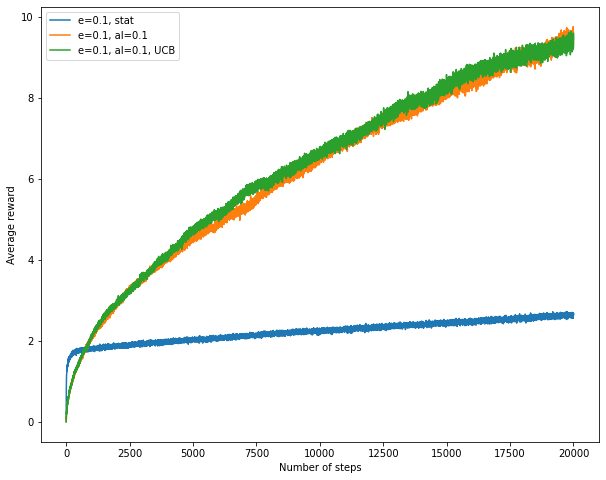

In [49]:
plt.figure(figsize=(10,8))
plt.plot(list(range(20000)), np.mean(R_out_list, axis=0), label='e=0.1, stat')
plt.plot(list(range(20000)), np.mean(R_out_list_1, axis=0), label='e=0.1, al=0.1')
plt.plot(list(range(20000)), np.mean(R_out_list_2, axis=0), label='e=0.1, al=0.1, UCB')
plt.xlabel("Number of steps")
plt.ylabel("Average reward")
plt.legend(loc='upper left')
plt.show()

### UCB

In [33]:
env = gym.make('CartPole-v0')
ans=[]
epoch=100

for i_episode in range(epoch):
    observation = env.reset()
    Q=[0,0]
    N=[0,0]
    for t in range(100):
        env.render()
        e=uniform(0,1)
        if e>0.5:
            if all(N):
                action = np.argmax(Q+100*np.sqrt(np.divide(np.log(t), N)), axis=0)
            else:
                action = np.argmax(Q, axis=0)
        else:
            action = randrange(2)
        observation, reward, done, info = env.step(action)
        N[action]+=1
        Q[action]=Q[action]+0.1*(reward-Q[action])
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            ans.append(t+1)
            break
env.close()
print(sum(ans)/epoch)

Episode finished after 44 timesteps
Episode finished after 28 timesteps
Episode finished after 10 timesteps
Episode finished after 16 timesteps
Episode finished after 27 timesteps
Episode finished after 24 timesteps
Episode finished after 14 timesteps
Episode finished after 27 timesteps
Episode finished after 18 timesteps
Episode finished after 74 timesteps
Episode finished after 10 timesteps
Episode finished after 9 timesteps
Episode finished after 22 timesteps
Episode finished after 50 timesteps
Episode finished after 10 timesteps
Episode finished after 13 timesteps
Episode finished after 26 timesteps
Episode finished after 15 timesteps
Episode finished after 34 timesteps
Episode finished after 37 timesteps
Episode finished after 36 timesteps
Episode finished after 12 timesteps
Episode finished after 37 timesteps
Episode finished after 9 timesteps
Episode finished after 9 timesteps
Episode finished after 15 timesteps
Episode finished after 25 timesteps
Episode finished after 29 times

### My experiments - kind of optimistic initial values

In [41]:
env = gym.make('CartPole-v0')
ans=[]
epoch=100

Q=np.array([0.,0.])

for i_episode in range(epoch):
    observation = env.reset()
    b = np.zeros_like(Q)
    b[Q.argmax(0)] = abs(np.max(Q))
    Q = b
    for t in range(100):
        env.render()
        e=uniform(0,1)
        if e>0.5:    
            action = np.argmax(Q, axis=0)
        else:
            action = randrange(2)
        observation, reward, done, info = env.step(action)
        Q[action]=Q[action]+0.1*(reward-Q[action])
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            ans.append(t+1)
            break
env.close()
print(sum(ans)/epoch)

Episode finished after 11 timesteps
Episode finished after 36 timesteps
Episode finished after 64 timesteps
Episode finished after 17 timesteps
Episode finished after 25 timesteps
Episode finished after 20 timesteps
Episode finished after 17 timesteps
Episode finished after 46 timesteps
Episode finished after 12 timesteps
Episode finished after 33 timesteps
Episode finished after 17 timesteps
Episode finished after 35 timesteps
Episode finished after 23 timesteps
Episode finished after 77 timesteps
Episode finished after 23 timesteps
Episode finished after 11 timesteps
Episode finished after 55 timesteps
Episode finished after 14 timesteps
Episode finished after 11 timesteps
Episode finished after 11 timesteps
Episode finished after 11 timesteps
Episode finished after 31 timesteps
Episode finished after 15 timesteps
Episode finished after 21 timesteps
Episode finished after 18 timesteps
Episode finished after 15 timesteps
Episode finished after 27 timesteps
Episode finished after 20 ti

In [33]:
Q

array([1.      , 0.468559])

In [42]:
env = gym.make('LunarLander-v2')

epoch=100

Q=np.array([0.0,0.0,0.0,0.0])
for i_episode in range(epoch):
    observation = env.reset()
    b = np.zeros_like(Q)
    b[np.argmax(Q, axis=0)] = abs(np.max(Q))
    Q = b   
    for t in range(500):
        env.render()
        e=uniform(0,1)
        if e>0.5:
            action = np.argmax(Q, axis=0)
        else:
            action = randrange(4)
        observation, reward, done, info = env.step(action) 
        Q[action]+=0.01*(reward-Q[action])
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()

Episode finished after 141 timesteps
Episode finished after 101 timesteps
Episode finished after 120 timesteps
Episode finished after 108 timesteps
Episode finished after 97 timesteps
Episode finished after 102 timesteps
Episode finished after 86 timesteps
Episode finished after 88 timesteps
Episode finished after 123 timesteps
Episode finished after 73 timesteps
Episode finished after 105 timesteps
Episode finished after 75 timesteps
Episode finished after 62 timesteps
Episode finished after 107 timesteps
Episode finished after 96 timesteps
Episode finished after 65 timesteps
Episode finished after 103 timesteps
Episode finished after 107 timesteps
Episode finished after 79 timesteps
Episode finished after 88 timesteps
Episode finished after 90 timesteps
Episode finished after 135 timesteps
Episode finished after 73 timesteps
Episode finished after 68 timesteps
Episode finished after 183 timesteps
Episode finished after 89 timesteps
Episode finished after 68 timesteps
Episode finished

In [43]:
Q

array([-0.13008902, -0.9656906 , -0.03148007, -0.12585378])

# Gradient Bandit Algorithm

In [24]:
env = gym.make('CartPole-v0')
ans=[]
epoch=100

for i_episode in range(epoch):
    observation = env.reset()
    Q=[0.,0.]
    H=[0.,0.]   
    for t in range(100):
        env.render()
        e=uniform(0,1)
        if e>0.5:
            action = np.argmax(H, axis=0)
        else:
            action = randrange(2)
        observation, reward, done, info = env.step(action)
        Q[action]=Q[action]+0.1*(reward-Q[action])
        
        exp=np.exp(H)   
        prob=np.divide(exp, np.sum(exp))
        
        for i in range(len(H)):
            if i==action:
                H[action]=H[action]+0.1*(reward-Q[action])*(1-prob[action])
            else:
                H[i]=H[i]+0.1*(reward-Q[i])*prob[i]
                
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            ans.append(t+1)
            break
env.close()
print(sum(ans)/epoch)

Episode finished after 43 timesteps
Episode finished after 49 timesteps
Episode finished after 54 timesteps
Episode finished after 63 timesteps
Episode finished after 27 timesteps
Episode finished after 32 timesteps
Episode finished after 33 timesteps
Episode finished after 23 timesteps
Episode finished after 31 timesteps
Episode finished after 24 timesteps
Episode finished after 36 timesteps
Episode finished after 26 timesteps
Episode finished after 20 timesteps
Episode finished after 27 timesteps
Episode finished after 31 timesteps
Episode finished after 30 timesteps
Episode finished after 55 timesteps
Episode finished after 42 timesteps
Episode finished after 28 timesteps
Episode finished after 37 timesteps
Episode finished after 24 timesteps
Episode finished after 27 timesteps
Episode finished after 32 timesteps
Episode finished after 38 timesteps
Episode finished after 18 timesteps
Episode finished after 47 timesteps
Episode finished after 24 timesteps
Episode finished after 37 ti

In [22]:
env = gym.make('LunarLander-v2')

epoch=20


for i_episode in range(epoch):
    observation = env.reset()
    Q=np.array([0.0,0.0,0.0,0.0])
    H=[0.,0.,0.,0.]
    for t in range(500):
        env.render()
        e=uniform(0,1)
        if e>0.5:
            action = np.argmax(H, axis=0)
        else:
            action = randrange(4)
        observation, reward, done, info = env.step(action) 
        Q[action]+=0.01*(reward-Q[action])
               
        exp=np.exp(H)   
        prob=np.divide(exp,np.sum(exp))
        
        for i in range(len(H)):
            if i==action:
                H[action]=H[action]+0.1*(reward-Q[action])*(1-prob[action])
            else:
                H[i]=H[i]+0.1*(reward-Q[i])*prob[i]
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()

Episode finished after 129 timesteps
Episode finished after 112 timesteps
Episode finished after 118 timesteps
Episode finished after 109 timesteps
Episode finished after 141 timesteps
Episode finished after 106 timesteps
Episode finished after 134 timesteps
Episode finished after 84 timesteps
Episode finished after 138 timesteps
Episode finished after 137 timesteps
Episode finished after 73 timesteps
Episode finished after 133 timesteps
Episode finished after 122 timesteps
Episode finished after 134 timesteps
Episode finished after 115 timesteps
Episode finished after 108 timesteps
Episode finished after 124 timesteps
Episode finished after 118 timesteps
Episode finished after 98 timesteps
Episode finished after 161 timesteps


In [14]:
Q

array([-0.6350082 , -0.62362163, -0.69319971, -1.55767149])